<a href="https://colab.research.google.com/github/varda0/PhishShield-AI/blob/main/URL_phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/content/drive/MyDrive/phishing_site_urls.csv")

In [4]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
df.shape

(549346, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [7]:
df.isnull().sum()

,0
URL,0
Label,0


In [8]:
df.Label.value_counts()

,count
Label,
good,392924
bad,156422


In [9]:
from nltk.tokenize import RegexpTokenizer

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [11]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [12]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
df["text_tokenized"] = df.URL.map(lambda t: tokenizer.tokenize(t))

In [14]:
df.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [15]:
from nltk.stem.snowball import SnowballStemmer

In [16]:
stemmer = SnowballStemmer("english")

In [17]:
df["text_stemmed"] = df["text_tokenized"].map(lambda l: [stemmer.stem(word) for word in l])

In [18]:
df.head()

,URL,Label,text_tokenized,text_stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [19]:
df["text"] = df["text_stemmed"].map(lambda l: ' '.join(l))

In [20]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [21]:
good_sites = df[df.Label == "good"]
bad_sites = df[df.Label == "bad"]

In [22]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
from io import BytesIO

def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set (STOPWORDS)
    more_stopwords = {'com', 'http'}
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud (background_color='white',
    stopwords = stopwords,
    max_words = max_words,
    max_font_size = max_font_size,
    random_state = 42,
    mask = mask)
    wordcloud.generate(text)
    plt. figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator (mask) ;
        plt. imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
        'verticalalignment': 'bottom'})
    else:
        plt. imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
        'verticalalignment': 'bottom'})
    plt. axis('off');
    plt. tight_layout()

In [23]:
all_text = ' '.join(good_sites["text"].tolist())

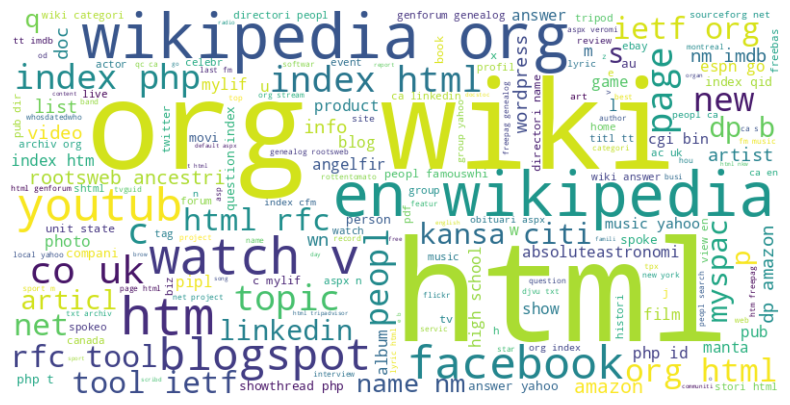

In [26]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt. figure(figsize=(10, 5))
plt. imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt. show()

In [27]:
all_text = ' '.join(bad_sites["text"].tolist())

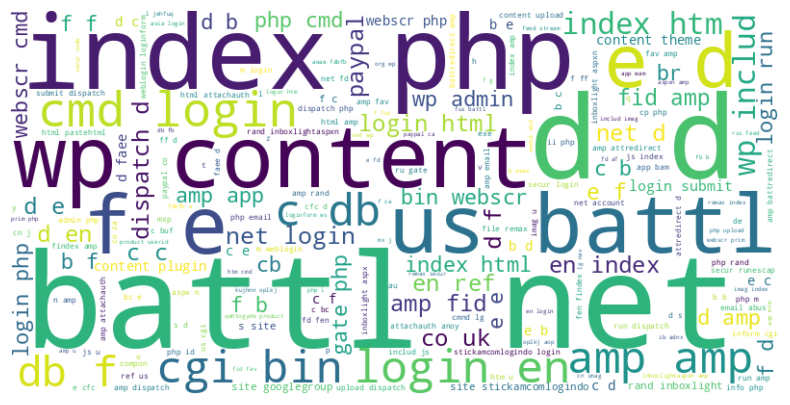

In [28]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt. figure(figsize=(10, 5))
plt. imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt. show()

In [29]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [32]:
features = cv.fit_transform(df.text)

In [34]:
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(features, df.Label, test_size=0.2)

**Model Training**

In [47]:
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression(max_iter=1000)

In [48]:
l_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
l_model.score(x_test, y_test)

0.965249840720852

In [50]:
l_model.score(x_train, y_train)

0.9796371132894629

In [51]:
from sklearn.metrics import classification_report

In [52]:
print("\nClassification Report\n")
print(classification_report(l_model.predict(x_test), y_test,
                            target_names=['bad', 'good']))


Classification Report

              precision    recall  f1-score   support

         bad       0.91      0.97      0.94     29279
        good       0.99      0.96      0.98     80591

    accuracy                           0.97    109870
   macro avg       0.95      0.97      0.96    109870
weighted avg       0.97      0.97      0.97    109870



In [53]:
from sklearn.metrics import confusion_matrix
con_mat = pd.DataFrame(confusion_matrix(l_model.predict(x_test), y_test),
                       columns = ['Predicted:Bad', 'Predicted: Good '],
                       index = ['Actual:Bad', 'Actual:Good ' ])


CONFUSION MATRIX


<Axes: >

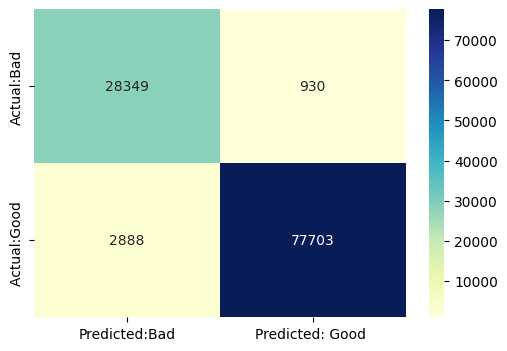

In [55]:
import seaborn as sns
print ('\nCONFUSION MATRIX')
plt. figure(figsize= (6,4))
sns. heatmap (con_mat, annot = True, fmt='d', cmap="YlGnBu")

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
mnb = MultinomialNB()

In [60]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [61]:
mnb.score(x_test, y_test)

0.9585328115045053

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [63]:
dt_model.score(x_test, y_test)

0.9692181669245472

In [64]:
dt_model.score(x_train, y_train)

0.9998953298928724

In [65]:
print("\nClassification Report for Decision Tree Model\n")
print(classification_report(dt_model.predict(x_test), y_test,
                            target_names=['bad', 'good']))


Classification Report for Decision Tree Model

              precision    recall  f1-score   support

         bad       0.94      0.95      0.95     31133
        good       0.98      0.98      0.98     78737

    accuracy                           0.97    109870
   macro avg       0.96      0.96      0.96    109870
weighted avg       0.97      0.97      0.97    109870




CONFUSION MATRIX FOR DECISION TREE


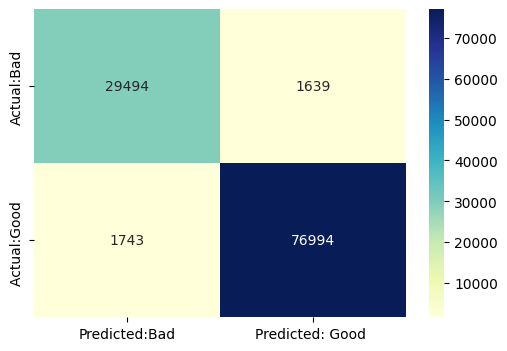

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

con_mat_dt = pd.DataFrame(confusion_matrix(dt_model.predict(x_test), y_test),
                          columns = ['Predicted:Bad', 'Predicted: Good '],
                          index = ['Actual:Bad', 'Actual:Good ' ])

print ('\nCONFUSION MATRIX FOR DECISION TREE')
plt. figure(figsize= (6,4))
sns. heatmap (con_mat_dt, annot = True, fmt='d', cmap="YlGnBu")
plt. show()

**Saving model for deployment**

In [67]:
import pickle

In [68]:
filename = 'phishingURL.pkl'
pickle.dump(dt_model, open(filename, 'wb'))

In [69]:
pickle.dump(cv, open('vectorizer.pkl', 'wb'))

* Bad links => this are phishing sites

    yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php

    fazan-pacir.rs/temp/libraries/ipad

    www.tubemoviez.exe

    svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => this are not phishing sites

    www.youtube.com/

    youtube.com/watch?v=q[0TQJI3vdU

    www.retailhellunderground.com/

    restorevisioncenters.com/html/technology.html

In [70]:
predict_bad = ["yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php","fazan-pacir.rs/temp/libraries/ipad","www.tubemoviez.exe","svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt"]

In [71]:
predict_good = ["www.youtube.com/","youtube.com/watch?v=q[0TQJI3vdU","www.retailhellunderground.com/","restorevisioncenters.com/html/technology.html"]

In [72]:
predict_good = cv.transform(predict_good)

In [73]:
predict_bad = cv.transform(predict_bad)

In [74]:
dt_model.predict(predict_bad)

array(['bad', 'bad', 'bad', 'bad'], dtype=object)

In [75]:
dt_model.predict(predict_good)

array(['good', 'good', 'good', 'good'], dtype=object)

In [76]:
dt_model.predict("https://www.microsoft.com/en-us/security")

ValueError: could not convert string to float: 'https://www.microsoft.com/en-us/security'

In [77]:
# Preprocess the new URL
new_url = "https://www.microsoft.com/en-us/security"

# Tokenize the URL
tokenized_url = tokenizer.tokenize(new_url)
print(f"Tokenized URL: {tokenized_url}")

# Stem the tokens
stemmed_url = [stemmer.stem(word) for word in tokenized_url]
print(f"Stemmed URL: {stemmed_url}")

# Join the stemmed tokens into a string
processed_url = ' '.join(stemmed_url)
print(f"Processed URL: {processed_url}")

# Transform the processed URL using the fitted CountVectorizer
transformed_url = cv.transform([processed_url])
print(f"Transformed URL shape: {transformed_url.shape}")

Tokenized URL: ['https', 'www', 'microsoft', 'com', 'en', 'us', 'security']
Stemmed URL: ['https', 'www', 'microsoft', 'com', 'en', 'us', 'secur']
Processed URL: https www microsoft com en us secur
Transformed URL shape: (1, 350837)


In [78]:
# Make the prediction using the Decision Tree model
prediction = dt_model.predict(transformed_url)

print(f"\nThe URL '{new_url}' is predicted to be: {prediction[0]}")


The URL 'https://www.microsoft.com/en-us/security' is predicted to be: good


In [79]:
# Preprocess the new URL
new_url = "http://secure-paypal-login.com/update"

# Tokenize the URL
tokenized_url = tokenizer.tokenize(new_url)
print(f"Tokenized URL: {tokenized_url}")

# Stem the tokens
stemmed_url = [stemmer.stem(word) for word in tokenized_url]
print(f"Stemmed URL: {stemmed_url}")

# Join the stemmed tokens into a string
processed_url = ' '.join(stemmed_url)
print(f"Processed URL: {processed_url}")

# Transform the processed URL using the fitted CountVectorizer
transformed_url = cv.transform([processed_url])
print(f"Transformed URL shape: {transformed_url.shape}")

Tokenized URL: ['http', 'secure', 'paypal', 'login', 'com', 'update']
Stemmed URL: ['http', 'secur', 'paypal', 'login', 'com', 'updat']
Processed URL: http secur paypal login com updat
Transformed URL shape: (1, 350837)


In [80]:
# Make the prediction using the Decision Tree model
prediction = dt_model.predict(transformed_url)

print(f"\nThe URL '{new_url}' is predicted to be: {prediction[0]}")


The URL 'http://secure-paypal-login.com/update' is predicted to be: bad
